In [1]:
import numpy as np 
import pandas as pd 
import json
import os
from top2vec import Top2Vec

ModuleNotFoundError: No module named 'numpy'

In [2]:
df = pd.read_csv("/home/duvuki/omdena-colombia-socialnetwork/src/data/task-2-preprocessing/merged_data/Final/Final_all.csv", usecols = ["preprocessed_data_without_hashtags"])
df.head()

NameError: name 'pd' is not defined

In [16]:
doc = df['preprocessed_data_without_hashtags'].values.tolist()

## Train Top2Vec Model

##### Resources used: https://jovian.ai/kamilpolak/top2vec-internet-news-topic-modeling; https://www.kaggle.com/dangelov/covid-19-topic-modeling-and-search-with-top2vec

#### Parameters:

##### documents: Input corpus, should be a list of strings.
##### speed: This parameter will determine how fast the model takes to train. The 'fast-learn' option is the fastest and will generate the lowest quality vectors. The 'learn' option will learn better quality vectors but take a longer time to train. The 'deep-learn' option will learn the best quality vectors but will take significant time to train.
##### workers: The amount of worker threads to be used in training the model. Larger amount will lead to faster training.

In [17]:
model = Top2Vec(documents=doc, speed="learn", workers=8)

2021-09-10 22:44:26,014 - top2vec - INFO - Pre-processing documents for training
2021-09-10 22:44:27,516 - top2vec - INFO - Creating joint document/word embedding
2021-09-10 22:46:56,341 - top2vec - INFO - Creating lower dimension embedding of documents
2021-09-10 22:47:45,313 - top2vec - INFO - Finding dense areas of documents
2021-09-10 22:47:48,417 - top2vec - INFO - Finding topics


## Explore Top2Vec Discovered Topics

In [18]:
#get the number of topics
model.get_num_topics()

87

In [19]:
#Get Topics
#This will return the topics in decreasing size.

topic_words, word_scores, topic_nums = model.get_topics(87)

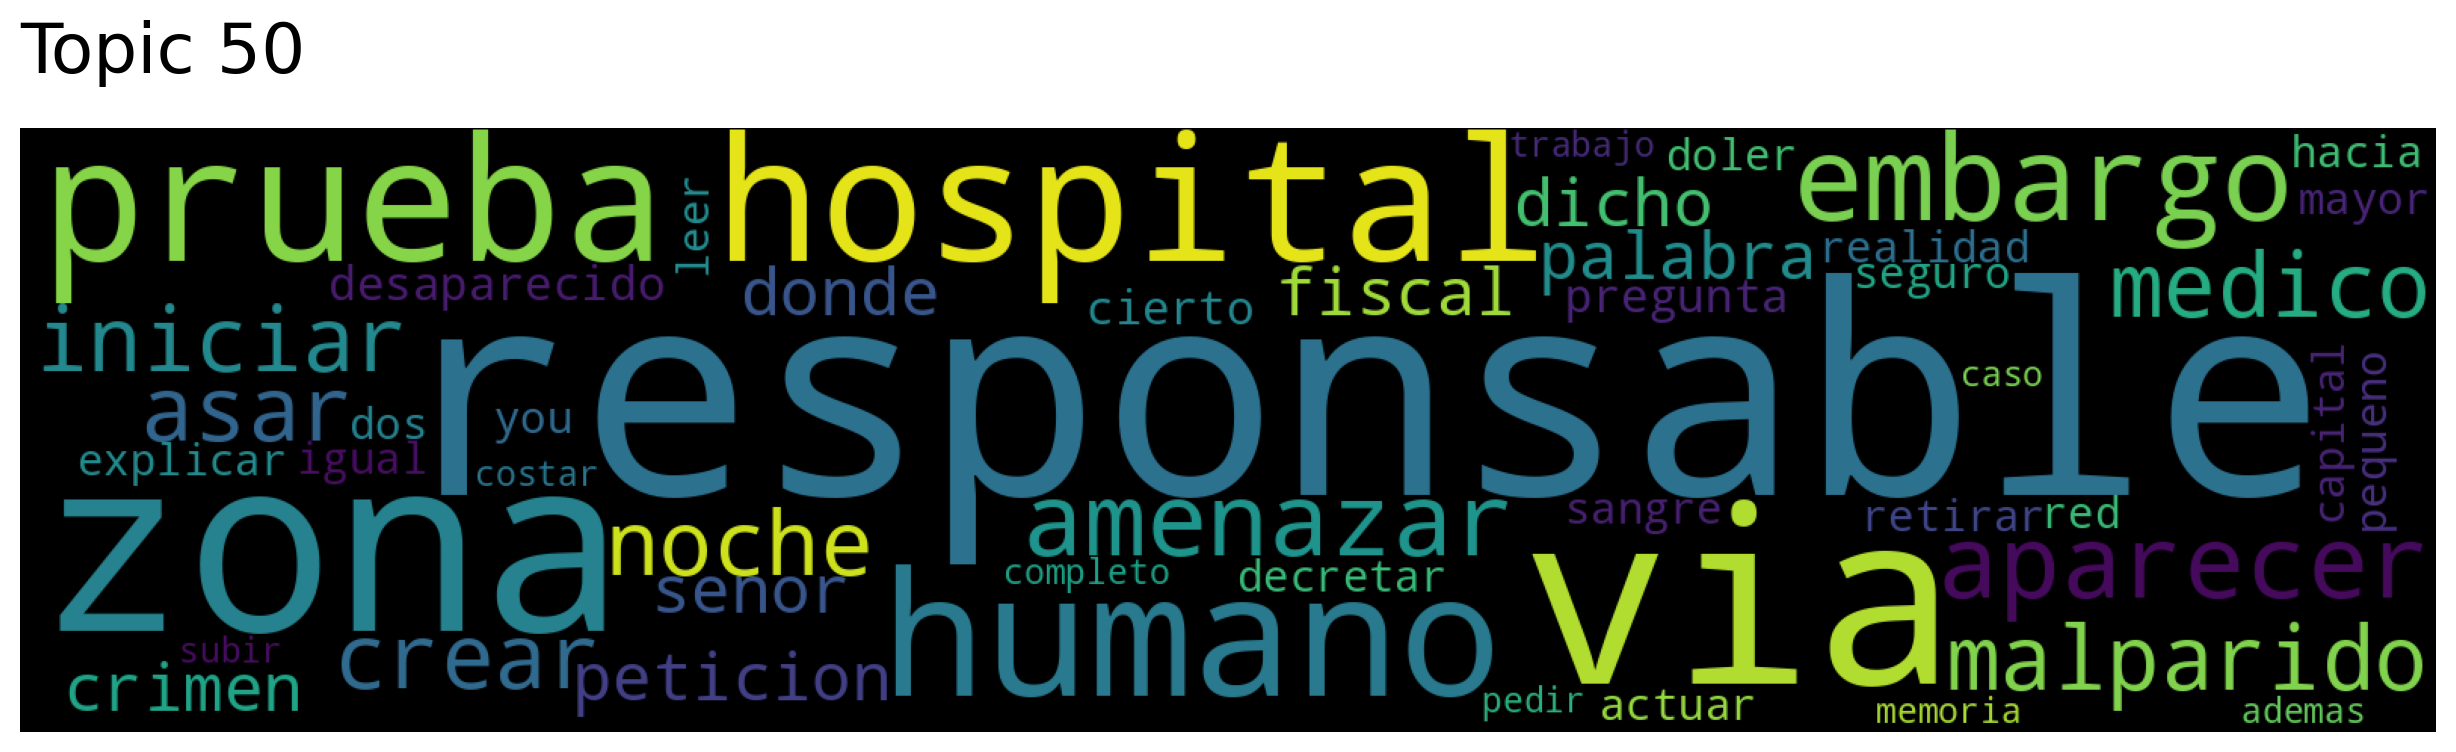

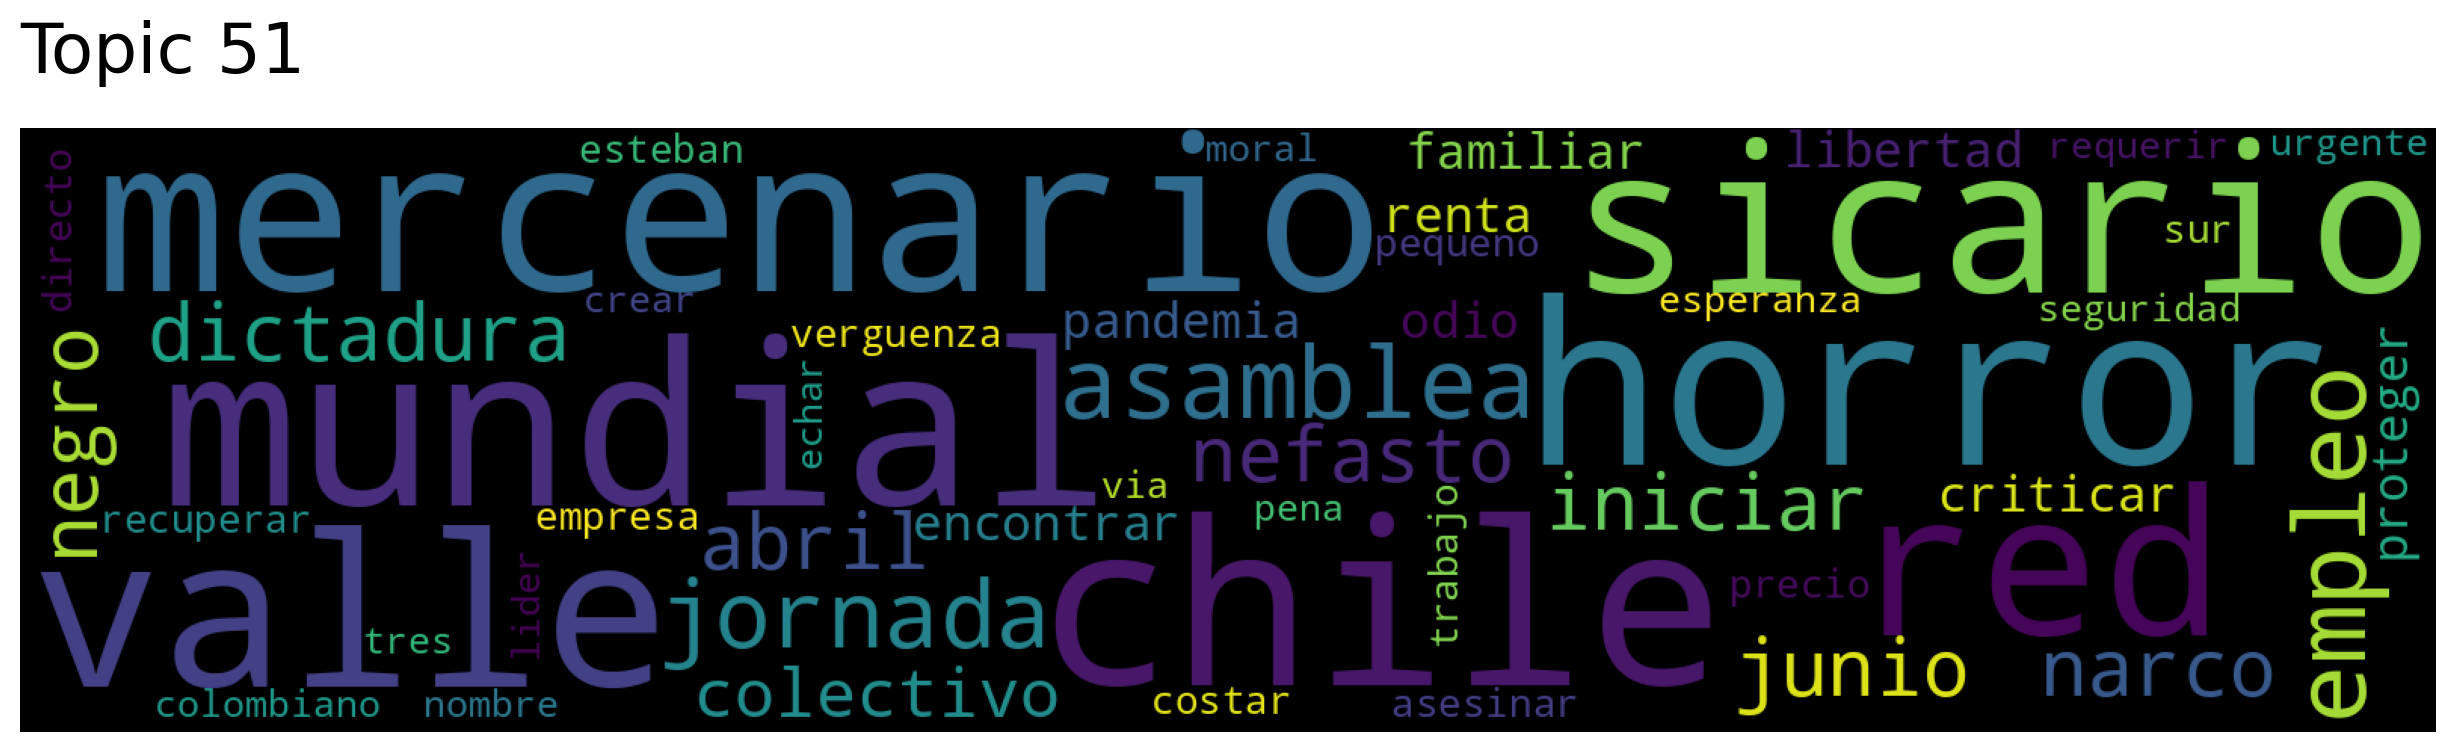

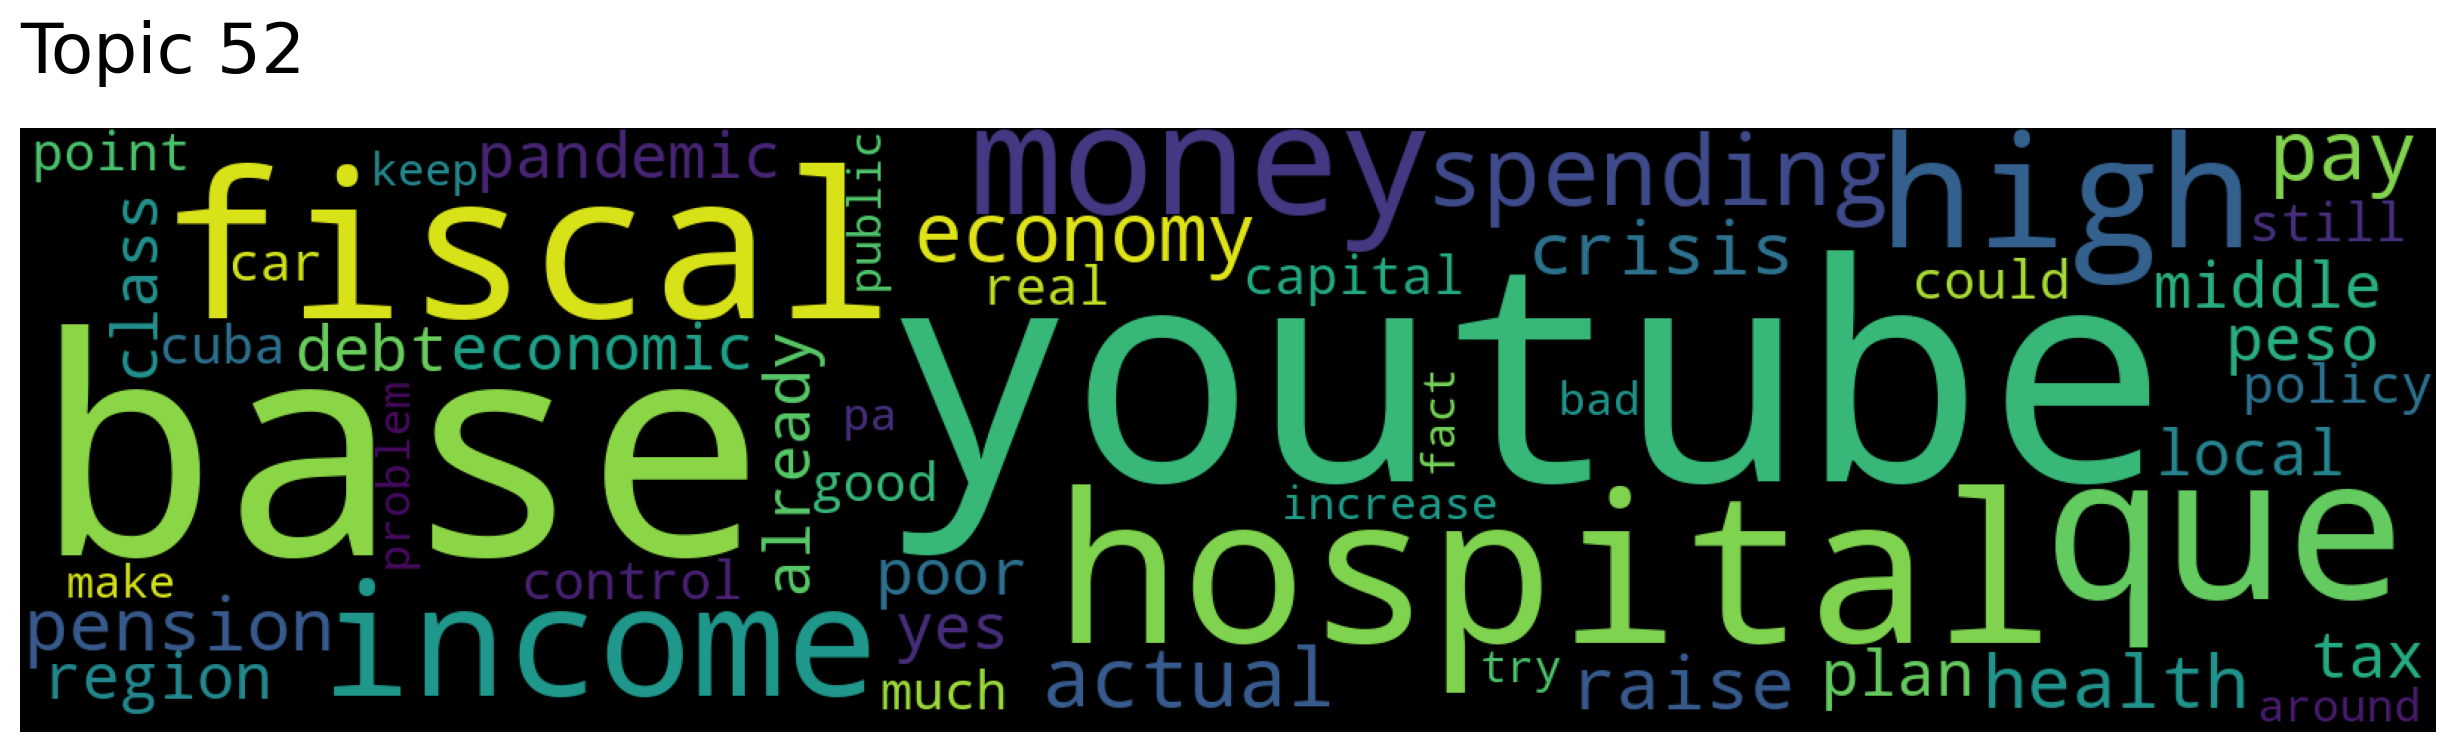

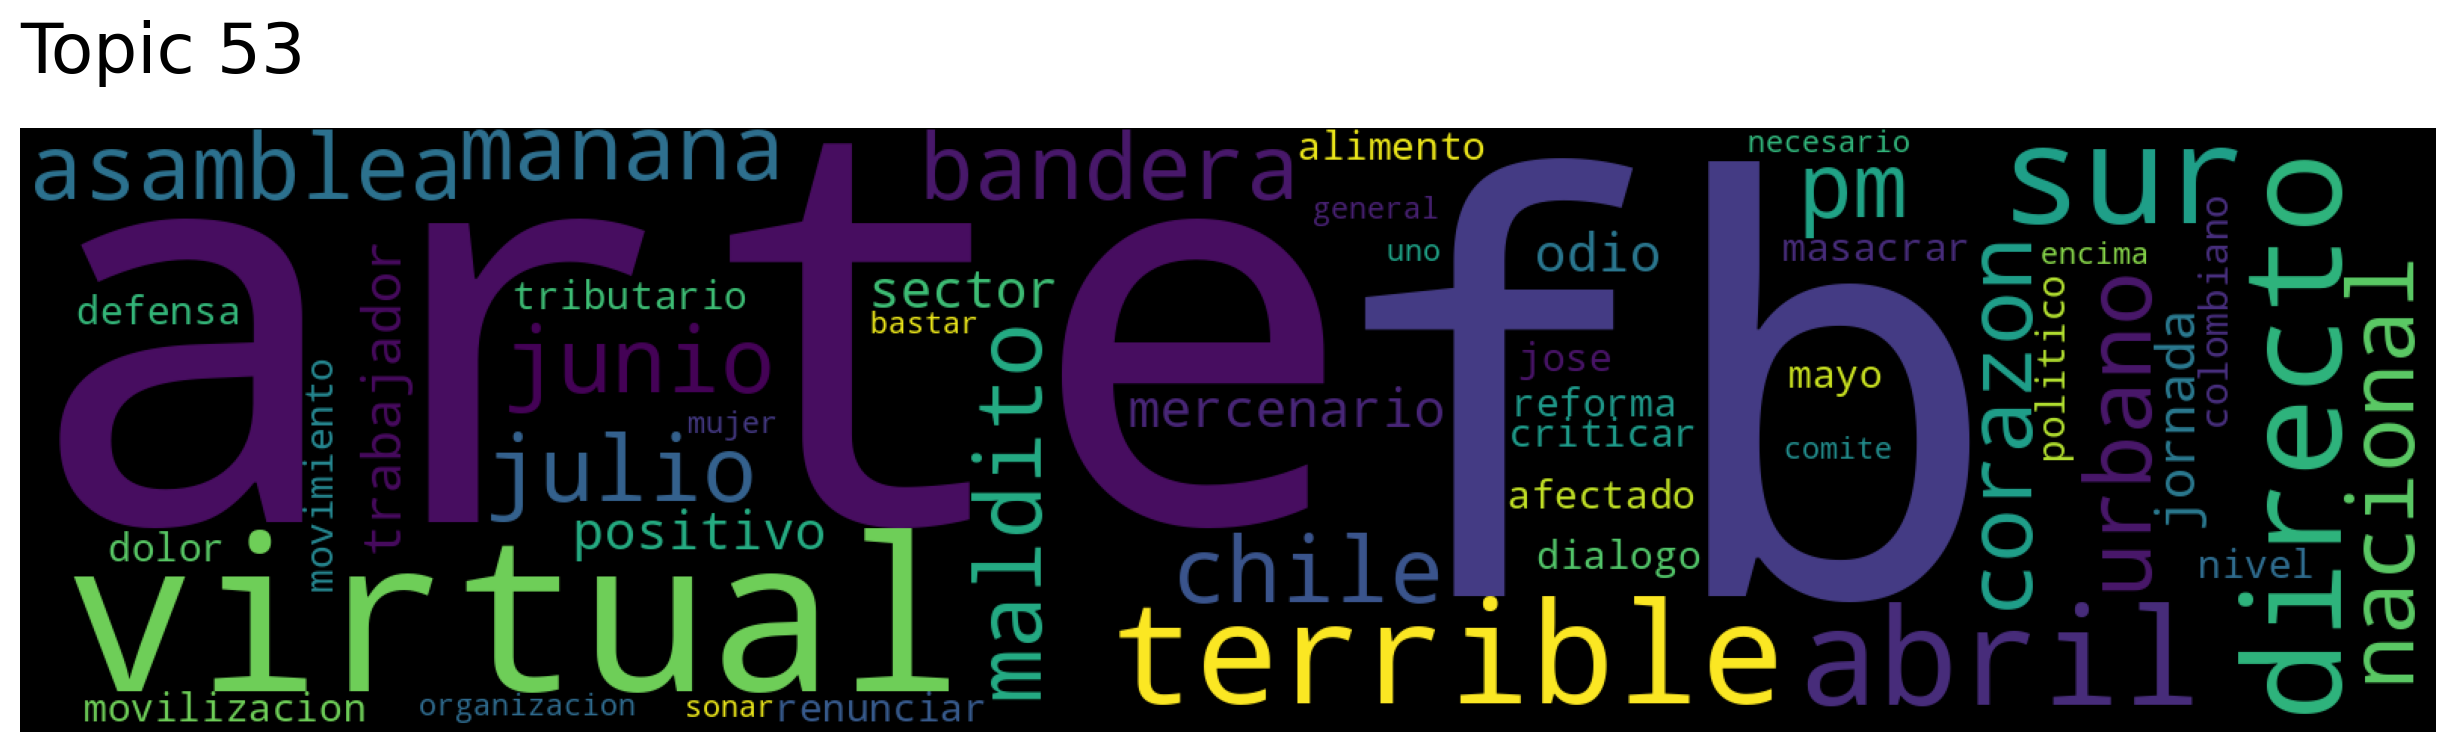

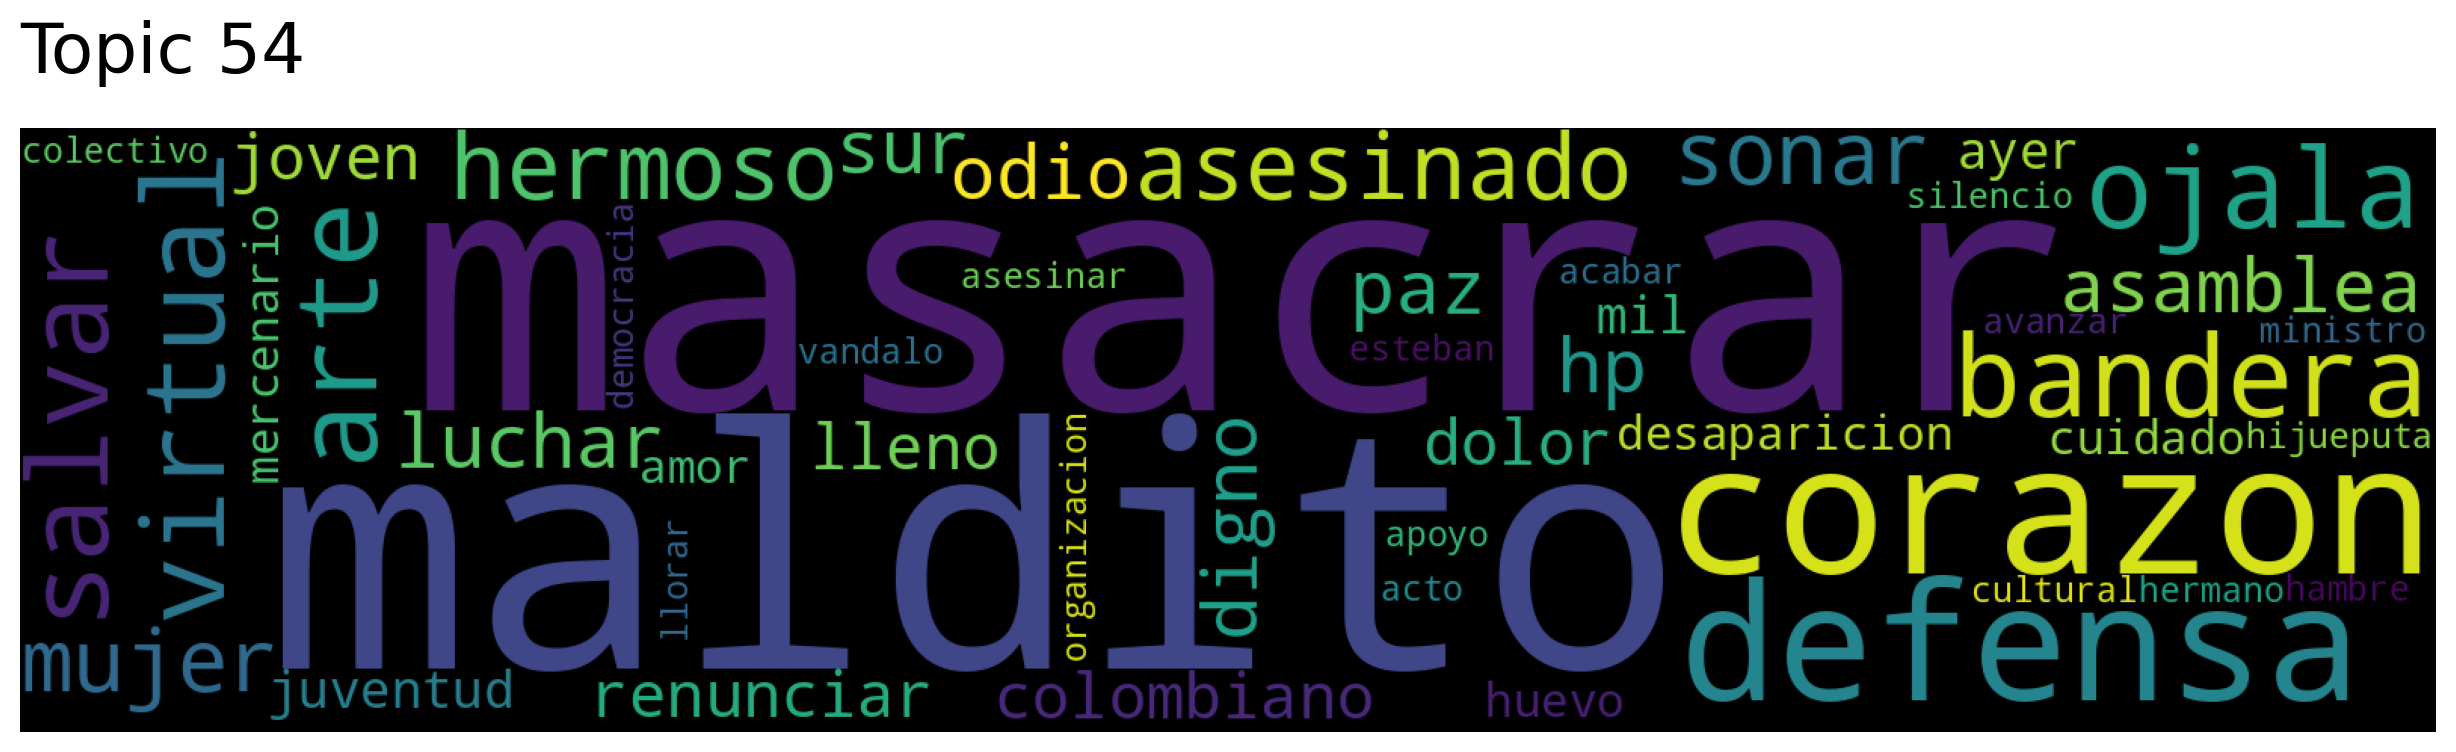

In [21]:
#Generate Word Clouds
for topic in topic_nums[50:55]:
    model.generate_topic_wordcloud(topic, background_color="black")

In [22]:
#Search Tweets by Topic
#We are going to search by topic 15
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=15, num_docs=2)


In [33]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=15, num_docs=2)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Tweet: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Tweet: 16066, Score: 0.9746928215026855
-----------
['jugar', 'persona', 'ahi', 'parqco', 'guerrillero', 'amar', 'ridicul', 'avez', 'merecer', 'ser', 'verdad', 'reiterar', 'avez']
-----------

Tweet: 15236, Score: 0.9716748595237732
-----------
['ganar', 'chichiguo', 'problema', 'corrupcion', 'falta', 'democracia']
-----------



## Similar Keywords

In [31]:
#Search for similar words to colombia
words, word_scores = model.similar_words(keywords=["colombia"], keywords_neg=[], num_words=10)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

family 0.9606109260990332
even 0.9522754018552342
colombian 0.951776318577117
city 0.948700220565467
get 0.9474722310239136
go 0.9470522619613891
point 0.9464783611867456
since 0.9450141269415713
let 0.9444328074767316
around 0.9442465313545528


## Search Tweets by Keywords

In [32]:
# getting error
documents, document_scores, document_nums = model.search_documents_by_keyword(keywords=["colombia", "strike"], num_docs=4)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()


AttributeError: 'Top2Vec' object has no attribute 'search_documents_by_keyword'